# Splines cúbicos con condición de frontera B0=1


In [15]:
import numpy as np
import sympy as sym
from IPython.display import display

def cubic_spline_frontera(xs: list[float], ys: list[float], B0=1, B1=0) -> list[sym.Symbol]:
    """
    Cubic spline interpolation con condiciones de frontera B0 y B1.
    B0: valor de la derivada en el punto inicial
    B1: valor de la derivada en el punto final
    """
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1

    h = [xs[i + 1] - xs[i] for i in range(n)]

    # Sistema de ecuaciones modificado para condiciones de frontera
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)

    # Primera fila (condición B0)
    A[0, 0] = 2
    A[0, 1] = 1
    b[0] = 3*(ys[1]-ys[0])/h[0] - 3*B0

    # Filas intermedias
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2*(h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3*(ys[i+1]-ys[i])/h[i] - 3*(ys[i]-ys[i-1])/h[i-1]

    # Última fila (condición B1)
    A[n, n-1] = 1
    A[n, n] = 2
    b[n] = 3*B1 - 3*(ys[n]-ys[n-1])/h[n-1]

    # Resolver sistema para obtener c
    c = np.linalg.solve(A, b)

    # Calcular a, b, d
    a = ys.copy()
    b_values = [0] * n
    d_values = [0] * n

    for j in range(n):
        d_values[j] = (c[j+1] - c[j])/(3*h[j])
        b_values[j] = (ys[j+1]-ys[j])/h[j] - h[j]*(2*c[j]+c[j+1])/3

    # Construir splines
    x = sym.Symbol("x")
    splines = []

    for j in range(n):
        S = a[j] + b_values[j]*(x-xs[j]) + c[j]*(x-xs[j])**2 + d_values[j]*(x-xs[j])**3
        splines.append(S)

    return splines

In [16]:
# Probemos los splines con condición de frontera con las mismas coordenadas
xs = [0, 1, 2]
ys = [1, 5, 3]

# Probamos con B0=1 y un valor específico de B1
B0 = 1
B1_test = 2
splines_frontera = cubic_spline_frontera(xs=xs, ys=ys, B0=B0, B1=B1_test)

print(f"Splines con condición de frontera B0={B0} y B1={B1_test}:")
_ = [display(s) for s in splines_frontera]
print("______")
_ = [display(s.expand()) for s in splines_frontera]

Splines con condición de frontera B0=1 y B1=2:


-6.25*x**3 + 9.25*x**2 + 1.0*x + 1

0.75*x + 6.75*(x - 1)**3 - 9.5*(x - 1)**2 + 4.25

______


-6.25*x**3 + 9.25*x**2 + 1.0*x + 1

6.75*x**3 - 29.75*x**2 + 40.0*x - 12.0

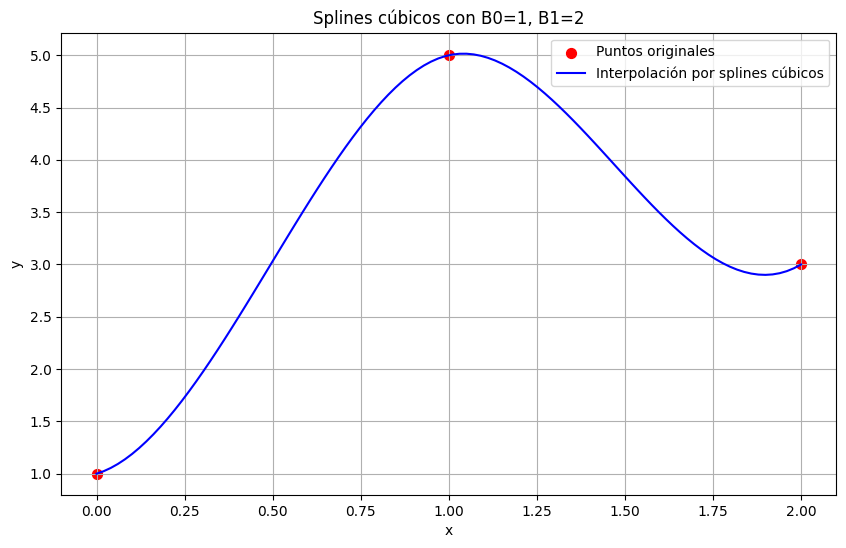

In [17]:
# Graficamos un spline con condiciones de frontera específicas
import matplotlib.pyplot as plt

def plot_spline(xs, ys, B0, B1):
    """Grafica un spline con condiciones de frontera B0 y B1"""
    splines = cubic_spline_frontera(xs=xs, ys=ys, B0=B0, B1=B1)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficamos los puntos originales
    ax.scatter(xs, ys, color='red', s=50, label='Puntos originales')

    # Graficamos los splines
    x = sym.Symbol('x')
    x_vals = np.linspace(min(xs), max(xs), 100)
    y_vals = []

    # Para cada valor x, evaluamos el spline correspondiente
    for x_val in x_vals:
        # Determinamos qué spline usar
        idx = 0
        for i in range(len(xs)-1):
            if xs[i] <= x_val <= xs[i+1]:
                idx = i
                break

        # Convertimos la expresión simbólica a una función numérica y evaluamos
        spline_func = sym.lambdify(x, splines[idx])
        y_vals.append(spline_func(x_val))

    ax.plot(x_vals, y_vals, 'b-', label='Interpolación por splines cúbicos')

    # Configuramos el gráfico
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Splines cúbicos con B0={B0}, B1={B1}')
    ax.grid(True)
    ax.legend()

    return fig, ax

# Ejemplo de uso con B0=1 y B1=2
plot_spline(xs, ys, B0=1, B1=2)
plt.show()

# Animación de la variación de los splines cúbicos al variar B1 con B0=1


In [18]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def create_animation(xs, ys, B0=1):
    """
    Crea una animación que muestra cómo varía el spline cúbico
    al cambiar el valor de B1, manteniendo B0 constante.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    def update(B1):
        ax.clear()

        # Generar splines con B0 fijo y B1 variable
        splines = cubic_spline_frontera(xs=xs, ys=ys, B0=B0, B1=B1)

        # Graficar puntos originales
        ax.scatter(xs, ys, color='red', s=50, label='Puntos originales')

        # Graficar splines
        x = sym.Symbol('x')
        x_vals = np.linspace(min(xs), max(xs), 100)
        y_vals = []

        for x_val in x_vals:
            idx = 0
            for i in range(len(xs)-1):
                if xs[i] <= x_val <= xs[i+1]:
                    idx = i
                    break

            spline_func = sym.lambdify(x, splines[idx])
            y_vals.append(spline_func(x_val))

        ax.plot(x_vals, y_vals, 'b-', label='Interpolación por splines')

        # Configurar gráfico
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'Splines cúbicos con B0={B0}, B1={B1:.2f}')
        ax.grid(True)
        ax.legend()

        # Mantener límites de ejes consistentes para mejor visualización
        ax.set_ylim([min(ys)-2, max(ys)+4])

    # Crear animación con diferentes valores de B1
    B1_values = np.linspace(-5, 5, 50)
    ani = FuncAnimation(fig, update, frames=B1_values, interval=200)

    plt.close()
    return ani

# Crear la animación para los puntos (0,1), (1,5), (2,3) con B0=1
animation = create_animation(xs, ys, B0=1)

# Mostrar la animación
HTML(animation.to_jshtml())

#Grafico 2